  # Day 4 Homework: Human de Novo Mutations

In [2]:
#load modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

# 1) and 2) Load and wrangle the data

In [57]:
#Read in datafile
# read data from Dropbox URL: "https://www.dropbox.com/s/rjefaxqmud51nfg/penguins.csv?dl=1"
mutations_df = pd.read_csv("~/qbb2021-answers/day4-homework/aau1043_dnm.tsv")
mutations_df

ages_df = pd.read_csv("~/qbb2021-answers/day4-homework/aau1043_parental_age.tsv")


# 3) Count the number of de novo mutations per proband

In [101]:
#Make 2 more dataframes, one for father-inherited mutations, one for 
#mother-inherited, and 1 for unconfirmed origin

#Mother inherited
roi = mutations_df.loc[:,"Phase_combined"] == "mother"
df_mother = mutations_df.loc[roi,:]
df_mother
df_mother_counts = df_mother.Proband_id.value_counts()

#Father inherited
roi = mutations_df.loc[:,"Phase_combined"] == "father"
df_father = mutations_df.loc[roi,:]
df_father
df_father_counts = df_father.Proband_id.value_counts()

#Extract mutation counts by proband_id in the main dataframe
df_counts = mutations_df.Proband_id.value_counts()
pd.DataFrame(df_counts)
type(df_counts)

pandas.core.series.Series

   # 4) Merge mutation counts with maternal and paternal ages

In [260]:
#3) and 4)
#Merge Paternal Counts, Maternal Counts, and Total Counts
result = pd.merge(df_counts,
                 df_father_counts, left_index = True, right_index = True)
result = pd.merge(result,
                 df_mother_counts, left_index = True, right_index = True)

result.columns = ['Tot_Mut','Pat_Mut', 'Mat_Mut']

#Turn the index into a column named "Proband_id" in order to murge
#with parental ages df
result.reset_index(inplace=True)
result = result.rename(columns = {'index':'Proband_id'})

#Merge df with maternal mutation count df
result = pd.merge(ages_df,
                 result, on = ["Proband_id"])

result.head()
#total_mut.df = result

,Proband_id,Father_age,Mother_age,Tot_Mut,Pat_Mut,Mat_Mut
0,675,31,36,70,51,19
1,1097,19,19,39,26,12
2,1230,30,28,57,42,12
3,1481,32,20,68,53,14
4,1806,38,34,78,61,11


# 5) De Novo mutations by parental age

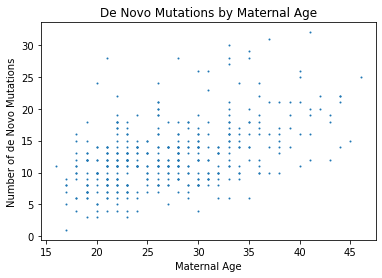

In [141]:
#plot the number of de novo mutations by maternal age
#set x and y coordinates 
x = result.loc[:,"Mother_age"]
y = result.loc[:,"Mat_Mut"]

fig, ax = plt.subplots()
ax.scatter(x,y, s=1)
plt.title("De Novo Mutations by Maternal Age")
plt.xlabel("Maternal Age")
plt.ylabel("Number of de Novo Mutations")
plt.show()

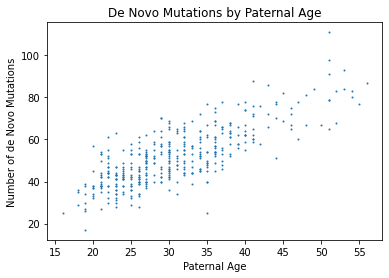

In [142]:
#plot the number of de novo mutations by paternal age
#set x and y coordinates 
x = result.loc[:,"Father_age"]
y = result.loc[:,"Pat_Mut"]

fig, ax = plt.subplots()
ax.scatter(x,y, s=1)
plt.title("De Novo Mutations by Paternal Age")
plt.xlabel("Paternal Age")
plt.ylabel("Number of de Novo Mutations")
plt.show()

   # 6) Ordinary Least Squares to test for association between maternal age and maternally inherited de novo mutations

In [130]:
model = smf.ols(formula = "Mat_Mut ~ 1 + Mother_age", data = result)
results = model.fit()
results.summary()
#results.pvalues

#P-Value = 6.88 x e^-24
#Size of the relationship: 0.3776 (slope)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Mat_Mut   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     116.0
Date:                Thu, 02 Sep 2021   Prob (F-statistic):           6.88e-24
Time:                        19:28:26   Log-Likelihood:                -1158.1
No. Observations:                 396   AIC:                             2320.
Df Residuals:                     394   BIC:                             2328.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5040      0.981      2.553      0.011       0.576       4.432
Mother_age     0.3776      0.035     10.772      0.000       0.309       0.446
==============================================================================
Omnibus:                       51.143   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.501
Skew:                           0.845   Prob(JB):                     4.03e-17
Kurtosis:                       4.310   Cond. No.                         121.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 7 Ordinary Least Squares to test for association between Paternal age and Paternally inherited de novo mutations

In [134]:
model = smf.ols(formula = "Pat_Mut ~ 1 + Father_age", data = result)
results = model.fit()
results.summary()
#results.pvalues

#P-Value = 1.55 x e^-84
#Size of the relationship: 1.3538 (slope)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Pat_Mut   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     639.6
Date:                Thu, 02 Sep 2021   Prob (F-statistic):           1.55e-84
Time:                        19:30:07   Log-Likelihood:                -1406.6
No. Observations:                 396   AIC:                             2817.
Df Residuals:                     394   BIC:                             2825.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3263      1.702      6.066      0.000       6.979      13.673
Father_age     1.3538      0.054     25.291      0.000       1.249       1.459
==============================================================================
Omnibus:                        7.687   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                8.185
Skew:                           0.256   Prob(JB):                       0.0167
Kurtosis:                       3.483   Cond. No.                         127.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 8) Plot a histogram of the number of maternal de novo mutations and paternal de novo mutations per proband on a single plot with semi-transparency.

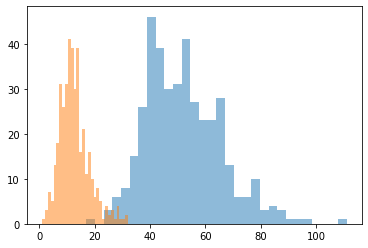

In [143]:

fig, ax = plt.subplots()
ax.hist(result.loc[:, "Pat_Mut"], bins=30, alpha = 0.5)
ax.hist(result.loc[:, "Mat_Mut"], bins=30, alpha = 0.5)
plt.show()

# 9) Test whether the number of maternally inherited de novo mutations per proband is significantly different than the number of paternally inherited de novo mutations per proband.



In [147]:
#Conduct t-test 
stats.ttest_ind(result.loc[:, "Pat_Mut"],
               result.loc[:, "Mat_Mut"])
#Result indicates yes, there is a statistically significant difference
#between maternally and paternally inhereited de novo mutations 

Ttest_indResult(statistic=53.403565287269245, pvalue=2.1986031793078793e-264)

# 10) Re-fit the models (questions 6, 7, and 9) above using Poisson regression.

# 10A) Use Poisson regression to test for maternal age and maternaly inherited de novo mutations 

In [155]:
model = smf.poisson(formula = "Mat_Mut ~ 1 + Mother_age", data = result)
results = model.fit()
results.summary()

#p-value = 5.1335 x e^-42
#Size of the relationship: 0.0281 (slope)
#results.pvalues

Optimization terminated successfully.
         Current function value: 2.927974
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                Mat_Mut   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Fri, 03 Sep 2021   Pseudo R-squ.:                 0.07164
Time:                        14:57:41   Log-Likelihood:                -1159.5
converged:                       True   LL-Null:                       -1248.9
Covariance Type:            nonrobust   LLR p-value:                 8.241e-41
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7671      0.060     29.235      0.000       1.649       1.886
Mother_age     0.0281      0.002     13.582      0.000       0.024       0.032
==============================================================================
"""

# 10B) Using Poisson regression to test for association between paternal age and paternally inherited de novo mutations 

In [203]:
model = smf.poisson(formula = "Pat_Mut ~ 1 + Father_age", data = result)
results = model.fit()
results.summary()
#results.pvalues

#P-Value = 1.1699 x e^-192
#Size of the relationship: 0.0241 (slope)

Optimization terminated successfully.
         Current function value: 3.578620
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                Pat_Mut   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Fri, 03 Sep 2021   Pseudo R-squ.:                  0.2277
Time:                        21:51:51   Log-Likelihood:                -1417.1
converged:                       True   LL-Null:                       -1834.9
Covariance Type:            nonrobust   LLR p-value:                1.004e-183
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1903      0.027    116.856      0.000       3.137       3.244
Father_age     0.0241      0.001     29.608      0.000       0.023       0.026
==============================================================================
"""

# 10C) Using Poisson regression, Test whether the number of maternally inherited de novo mutations per proband is significantly different than the number of paternally inherited de novo mutations per proband.

In [269]:
#Create long form table in order to use smf.poisson regression to
#determine if there is a statistically significant difference between
#de novo mutations that are paternally or maternally inherited 
 
#subset from result with only paternal columns
father_subset = result.loc[:,['Proband_id','Pat_Mut', 'Father_age']]
father_subset


,Proband_id,Pat_Mut,Father_age
0,675,51,31
1,1097,26,19
2,1230,42,30
3,1481,53,32
4,1806,61,38
...,...,...,...
391,153657,41,27
392,154565,61,36
393,154621,39,19
394,154810,55,32


In [270]:
#subset from result with only maternal columns
mother_subset = result.loc[:,['Proband_id','Mat_Mut', 'Mother_age']]
mother_subset

,Proband_id,Mat_Mut,Mother_age
0,675,19,36
1,1097,12,19
2,1230,12,28
3,1481,14,20
4,1806,11,34
...,...,...,...
391,153657,8,23
392,154565,14,30
393,154621,11,18
394,154810,14,28


In [271]:
#rename 'Father_age' and 'Mother_age' to "Pat" and "Mat"
for i in range(len(father_subset.index)):
    father_subset.iloc[i,2] = "Pat"
for i in range(len(mother_subset.index)):
    mother_subset.iloc[i,2] = "Mat"
mother_subset

,Proband_id,Mat_Mut,Mother_age
0,675,19,Mat
1,1097,12,Mat
2,1230,12,Mat
3,1481,14,Mat
4,1806,11,Mat
...,...,...,...
391,153657,8,Mat
392,154565,14,Mat
393,154621,11,Mat
394,154810,14,Mat


In [272]:
#stack both dataframes on top of each other 
pat_mat_subset = pd.DataFrame(np.vstack([father_subset,mother_subset]))
#rename column name to Parent
pat_mat_subset.columns =['Proband_id', 'Mut', 'Parent']
pat_mat_subset

,Proband_id,Mut,Parent
0,675,51,Pat
1,1097,26,Pat
2,1230,42,Pat
3,1481,53,Pat
4,1806,61,Pat
...,...,...,...
787,153657,8,Mat
788,154565,14,Mat
789,154621,11,Mat
790,154810,14,Mat


In [273]:
#Conduct the poisson linear regression
model = smf.poisson(formula = "Mut ~ 1 + Parent", data = pat_mat_subset)
results = model.fit()
results.summary()
#results.pvalues

ValueError: endog has evaluated to an array with multiple columns that has shape (792, 90). This occurs when the variable converted to endog is non-numeric (e.g., bool or str).

In [289]:
#Using "Parent" with string values "Mat" and "Pat" returns as error
#because vstack converts int data types to object
#and because "Pat" and "Mat" values are not of type int

#Substituting "Mat" and "Pat" with 1 and 2, respectively
for i in range(len(pat_mat_subset.index)):
    if pat_mat_subset.loc[i,"Parent"] == "Pat":
        pat_mat_subset.loc[i,"Parent"] = 1
    if pat_mat_subset.loc[i,"Parent"] == "Mat":
        pat_mat_subset.loc[i,"Parent"] = 2
pat_mat_subset

,Proband_id,Mut,Parent
0,675,51,1
1,1097,26,1
2,1230,42,1
3,1481,53,1
4,1806,61,1
...,...,...,...
787,153657,8,2
788,154565,14,2
789,154621,11,2
790,154810,14,2


In [291]:
#convert columns to intergers for poisson
pat_mat_subset['Parent'] = pat_mat_subset.Parent.astype(int)
pat_mat_subset['Mut'] = pat_mat_subset.Mut.astype(int)
pat_mat_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Proband_id  792 non-null    object
 1   Mut         792 non-null    int64 
 2   Parent      792 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 18.7+ KB


In [293]:
#Conduct the poisson linear regression
model = smf.poisson(formula = "Mut ~ 1 + Parent", data = pat_mat_subset)
results = model.fit()
results.summary()
#results.pvalues

#results indicate a significant p-value <0.05 meaning that there is a 
#significant difference between maternally and paternally inherited 
#de novo mutations 

Optimization terminated successfully.
         Current function value: 3.893765
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                    Mut   No. Observations:                  792
Model:                        Poisson   Df Residuals:                      790
Method:                           MLE   Df Model:                            1
Date:                Fri, 03 Sep 2021   Pseudo R-squ.:                  0.6206
Time:                        23:04:58   Log-Likelihood:                -3083.9
converged:                       True   LL-Null:                       -8128.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3552      0.020    270.552      0.000       5.316       5.394
Parent        -1.4036      0.016    -89.467      0.000      -1.434      -1.373
==============================================================================
"""

# 11) The interpretation of parameter estimates from Poisson regression differs from that of OLS. Using the relevant Poisson regression model that you fit, predict the number of paternal de novo mutations for a proband with a father who was 50.5 years old at the proband's time of birth.

In [205]:
#predict number of mutations based on father's age of 50.5
new_observation = pd.DataFrame({"Father_age" : [50.5]})
results.predict(new_observation)
#prediction based on this model is that the proband will have 82.03
#de novo mutations 

0    82.031316
dtype: float64